In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
#%matplotlib

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [4]:
# survey responses
X = ['Bored', 'Not great', 'OK', 'Kind of\ninterested', 'Excited']
Y = [11, 5, 40, 25, 19] # responses distribution before the program
Z = [12, 6, 14, 30, 38] # responses distribution after the program

/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(4.6,10,'$\\bf{AFTER}$\nprogram,\nmore children\nwere $\\it{Kind\\ of}$\n$\\it{interested\\ &}$\n$\\it{Excited}$ about\nscience.')

/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


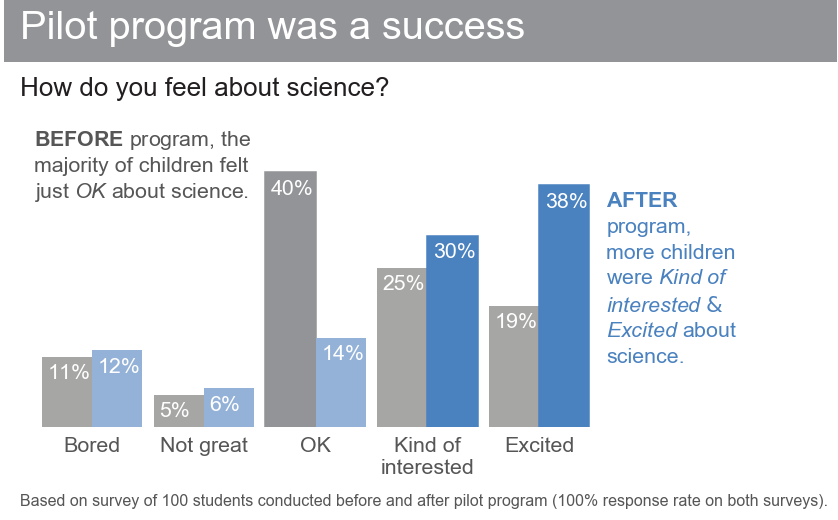

In [5]:
# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.665, bottom=0.17)

# There is no automatic support of subcategories bar plot in matplotlib.
def subcategorybar(X,  # categories names
                   vals,  # subcategories values
                   base_colors,  # base colors for each subcategory
                   special_colors,  # highlight colors for subcategories
                   special_bars,  # highlighted bars indicies 
                   width=0.9):  # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width / 2. + i / float(n) * width,
                       vals[i],
                       width=width / float(n),
                       align="edge",  # aligns bars by their left edges
                       color=base_colors[i])  # use base color for subcategory

        # add numerical data labels for each bar
        for bi, b in enumerate(bars):
            plt.text(b.get_x() + 0.05, b.get_height() - 3.5,
                     str(vals[i][bi]) + '%',
                     fontsize=14,
                     color='white')
        # highlight bars
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i])
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)


# draw subcategorical vertical bar plot
subcategorybar(X,  # responses
               [Y, Z],  # pre- and post- responses distribution
               [GRAY8, BLUE3],  # colors for pre- and post- bars
               [GRAY7, BLUE2],  # highlight colors for pre- and post- bars
               [[2], [3, 4]])  # highlight 3rd pre- and 4th,5th post- bar

# remove chart borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines
plt.tick_params(bottom='off', left='off', labelleft='off')

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY3)

# titile the plot
plt.text(-0.65, 61,
         'Pilot program was a success' + ' ' * 27,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.65, 52, 'How do you feel about science?', fontsize=17, 
         color=GRAY1)

# add footnote with the data source
plt.text(-0.65, -12.5,
         'Based on survey of 100 students conducted '
         'before and after pilot program '
         '(100% response rate on both surveys).',
         fontsize=10.5,
         color=GRAY3)

# add pre- note to plot
plt.text(-0.52, 36,
         '$\\bf{BEFORE}$ program, the\n'  # use mathtext \\bf for bold text
         'majority of children felt\n'
         'just $\\mathit{OK}$ about science.',  # use mathtext
         fontsize=14,
         linespacing=1.3,  # multiple of font size
         color=GRAY3)

# add post- note to plot
plt.text(4.6, 10,
         '$\\bf{AFTER}$\n'  # use mathtext \\b for bold text
         'program,\n'
         'more children\n'
         'were $\\it{Kind\ of}$\n'  # use mathtext \\mathit for italic text
         '$\\it{interested\ &}$\n'
         '$\\it{Excited}$ about\n'
         'science.',
         fontsize=14,
         linespacing=1.45,  # multiple of font size
         color=BLUE2)